## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A639DC3908>,
      dtype=object)

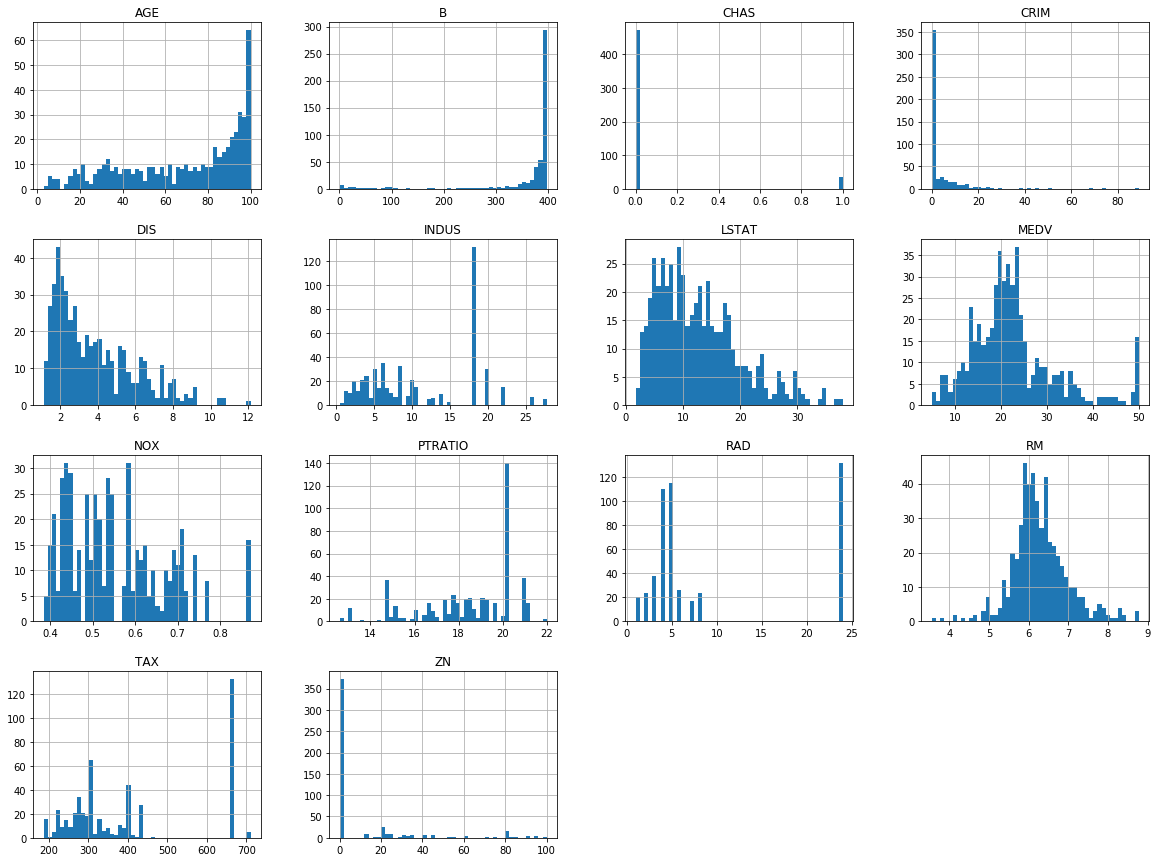

In [8]:
# # For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [9]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.3920,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.6140,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.4930,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.4930,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
411,14.05070,0.0,18.10,0,0.5970,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2
250,0.14030,22.0,5.86,0,0.4310,6.487,13.0,7.3967,7,330,19.1,396.28,5.90,24.4
100,0.14866,0.0,8.56,0,0.5200,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
429,9.33889,0.0,18.10,0,0.6790,6.380,95.6,1.9682,24,666,20.2,60.72,24.08,9.5
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6


In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
# 95/7

In [18]:
# 376/28

In [19]:
housing = strat_train_set.copy()

## Looking for Correlations

In [20]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [21]:
# from pandas.plotting import scatter_matrix
# attributes = ["MEDV", "RM", "ZN", "LSTAT"]
# scatter_matrix(housing[attributes], figsize = (12,8))

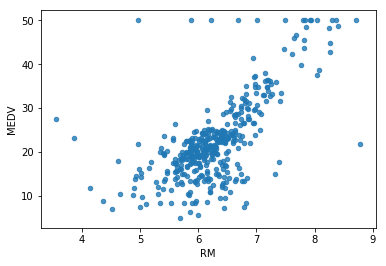

In [22]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations


In [23]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

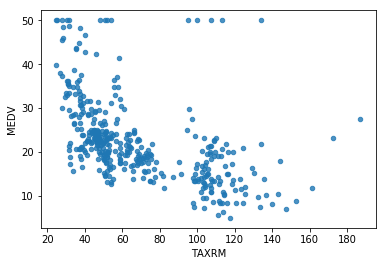

In [26]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [27]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [28]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [29]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(399, 13)

In [30]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [31]:
median = housing["RM"].median() # Compute median for Option 3

In [32]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
411    6.657
250    6.487
100    6.727
429    6.380
57     6.816
413    5.155
115    5.928
490    5.093
199    6.975
494    5.926
142    5.403
113    6.092
468    5.926
400    5.987
247    6.226
151    5.404
408    5.617
68     5.594
365    3.561
81     6.619
93     6.211
456    5.976
116    6.176
27     6.047
234    6.726
       ...  
433    6.436
430    6.348
479    6.229
438    5.935
38     5.966
18     5.456
97     8.069
266    7.014
133    5.822
449    6.417
477    5.304
171    5.880
180    7.765
158    6.066
279    6.812
109    6.229
82     6.302
386    4.652
418    5.957
126    5.613
446    6.341
101    6.781
277    6.826
405    5.683
367    3.863
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
housing.shape

(404, 13)

In [34]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [36]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [37]:
X = imputer.transform(housing)

In [38]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [60]:
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.3920,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.6140,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.4930,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.4930,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
5,14.05070,0.0,18.10,0.0,0.5970,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22
6,0.14030,22.0,5.86,0.0,0.4310,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90
7,0.14866,0.0,8.56,0.0,0.5200,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42
8,9.33889,0.0,18.10,0.0,0.6790,6.380,95.6,1.9682,24.0,666.0,20.2,60.72,24.08
9,0.01432,100.0,1.32,0.0,0.4110,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95


In [39]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating a Pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [41]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [42]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
some_data = housing.iloc[:5]

In [45]:
some_labels = housing_labels.iloc[:5]

In [46]:
prepared_data = my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([22.18, 25.67, 16.3 , 23.  , 23.56])

In [48]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [50]:
rmse

1.3488760447715036

## Using better evaluation technique - Cross Validation

In [51]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([2.89058564, 2.6860407 , 4.73268835, 2.14887208, 3.16761424,
       3.22760166, 4.30366181, 3.22283765, 3.48478945, 3.0663003 ])

In [53]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [54]:
print_scores(rmse_scores)

Scores: [2.89058564 2.6860407  4.73268835 2.14887208 3.16761424 3.22760166
 4.30366181 3.22283765 3.48478945 3.0663003 ]
Mean:  3.2930991885688883
Standard deviation:  0.7103944387712869


Quiz: Convert this notebook into a python file and run the pipeline using Visual Studio Code

## Saving the model

In [55]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [56]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [57]:
final_rmse

3.1877939695276516

In [58]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [59]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([25.41])